<a href="https://colab.research.google.com/github/AgunsBaba/Assignment/blob/master/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
#import data
data = pd.read_csv('/content/cust_seg.csv')
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [3]:
#feature engineering to add an extra feature called total_debt
data['total_debt'] = data['Card Debt'] + data['Other Debt']

In [4]:
#confirm new feature has been added to dataframe
data.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,total_debt
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3,1.197
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8,12.800
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9,11.913
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3,1.197
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2,18.216


In [5]:
#check general info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
 10  total_debt       850 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 73.2 KB


The 'Deafulted' column has some missing values which has to be handled

In [6]:
#confirm the labels in the 'Defaulted' column
data['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [7]:
#Fill missing values in 'Deaulted' column with the value 1
data['Defaulted'].fillna(value=1, inplace=True)
data.info() #confirm there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        850 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
 10  total_debt       850 non-null    float64
dtypes: float64(5), int64(6)
memory usage: 73.2 KB


In [8]:
#drop columns that have no predictive value
data = data.drop(columns=['Unnamed: 0', 'Customer Id'])

In [9]:
#scale the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

In [10]:
#fit the Kmeans algo
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_data)

KMeans(n_clusters=2)

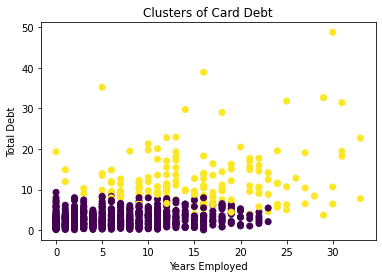

In [11]:
#create a column for the cluster labels in the dataset
data['cluster'] = kmeans.labels_ 

#Generate visualization to see the clusters based on Total Debt and Years Employed
plt.scatter(data['Years Employed'], data['total_debt'], c = data['cluster'])
plt.ylabel('Total Debt')
plt.xlabel('Years Employed')
plt.title('Clusters of Card Debt')
plt.show()

This clustering seems to split the population into show a group with total debt more than '10' and less than '10'. Based on the clsutering, it also seems that majority of the people with more than 20 years experience take on total debt that are more than '10'

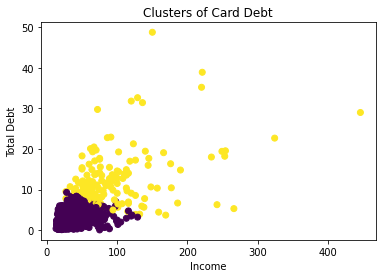

In [12]:
#Generate visualization to see the clusters based on Total Debt and Income
plt.scatter(data['Income'], data['total_debt'], c = data['cluster'])
plt.xlabel('Income')
plt.ylabel('Total Debt')
plt.title('Clusters of Card Debt')
plt.show()

The clustering seems to split the population into a group that has low income and low debt (bottom-left corner) and medium-to-high icome and somewhat high debt